In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas
from datetime import datetime

In [2]:
data = pandas.read_csv("data/store_train.csv")
data.Date = data.Date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
data

/home/iclee141/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [3]:
test = pandas.read_csv("data/store_test.csv")
test.Date = test.Date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [202]:
def store_kernel(x, y):
    x = x.values.reshape(x.shape[0], 1)
    y = y.values.reshape(y.shape[0], 1)
    return (((x - y.T) == 0) + 0)

def date_kernel( x, y ):
    ret = np.zeros((x.shape[0], y.shape[0]))
    for i, xi in enumerate(x):
        for j, yi in enumerate(y):
            ret[i][j] = (xi - yi).days
            
    return (1 / (np.power(ret,2) + 1))  * 10

def dow_kernel(x, y):
    x = x.values.reshape(x.shape[0], 1)
    y = y.values.reshape(y.shape[0], 1)
    return (((x - y.T) == 0) + 0) * 7

def open_kernel( x, y ):
    x = x.values.reshape(x.shape[0], 1)
    y = np.nan_to_num(y.values.reshape(y.shape[0], 1))
    return (x * y.T) * 5


def promo_kernel( x, y ):
    x = x.values.reshape(x.shape[0], 1)
    y = y.values.reshape(y.shape[0], 1)
    return (x * y.T) * 2

def sthol_kernel( x, y ):
    x = x.values.reshape(x.shape[0], 1)
    y = y.values.reshape(y.shape[0], 1)
    return ((x == y.T) + 0) * 4

def schol_kernel( x, y ):
    x = x.values.reshape(x.shape[0], 1)
    y = y.values.reshape(y.shape[0], 1)
    return (x * y.T) * 1

kernels = [store_kernel, dow_kernel, 
           date_kernel, 
           open_kernel, 
           promo_kernel, 
#            sthol_kernel, 
           schol_kernel
          ]
attributes = ['Store','DayOfWeek',
              'Date',
              'Open',
              'Promo',
#               'StateHoliday',
              'SchoolHoliday'
             ]
len(kernels) == len(attributes)

True

In [203]:
M = 100
# K = data.shape[0]
K = 10000 # 10,000
# K = 100 # 100
N = K - M
kmmat = np.zeros((M, M))
kmn = np.zeros(( M, K ))
data = data.sample(frac=1).reset_index(drop=True)
print 'M = ' + str(M)
print 'K = ' + str(K)
print 'N = ' + str(N)

M = 100
K = 10000
N = 9900


In [204]:
for i, attr in enumerate(attributes):
    kmmat += kernels[i](data.iloc[0:M][attr], data.iloc[0:M][attr])
    kmn += kernels[i](data.iloc[0:M][attr], data.iloc[0:K][attr])

The lighter the color the more similar the data is


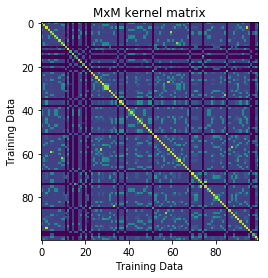

In [205]:
print "The lighter the color the more similar the data is"
plt.title('MxM kernel matrix')
plt.xlabel('Training Data')
plt.ylabel('Training Data')
plt.imshow( kmmat )
plt.show()

In [206]:
ktest = np.zeros((M, test.shape[0]))
for i, attr in enumerate(attributes):
    ktest += kernels[i](data.iloc[0:M][attr], test.iloc[:][attr])
    
ktest = ktest.T

In [207]:
sigma = 1
sigsqr = np.power(sigma, 2)
signeg = 1/sigsqr

In [208]:
y = np.array(data.iloc[0:K]['Sales']).reshape(K,1)
alpha = np.dot( kmn, y )
alpha = np.dot( np.linalg.pinv( np.dot( kmn, kmn.T ) + ( sigsqr * kmmat ) ), alpha )

In [209]:
print alpha.shape
print ktest.shape
print kmmat.shape
print kmn.shape

(100, 1)
(41088, 100)
(100, 100)
(100, 10000)


In [210]:
my_preds = np.dot((ktest), alpha)

print my_preds.shape

(41088, 1)


In [211]:
sfile = open( 'mean_sub2.csv', 'w' )
sfile.write( '"Id","Sales"\n' )
for id in range( 0, T ):
    if np.isnan(my_preds[id]):
        print test.iloc[id]
    sfile.write( '%d,%.2f\n' % ( id+1, my_preds[id] ) )  # add one for one-based indexing
sfile.close()

In [212]:
print 'MSE of 0.45371'

MSE of 0.45371
